<a href="https://colab.research.google.com/github/najirbasha41742/house-price-prediction-linear-regression/blob/main/Housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB
None
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226 

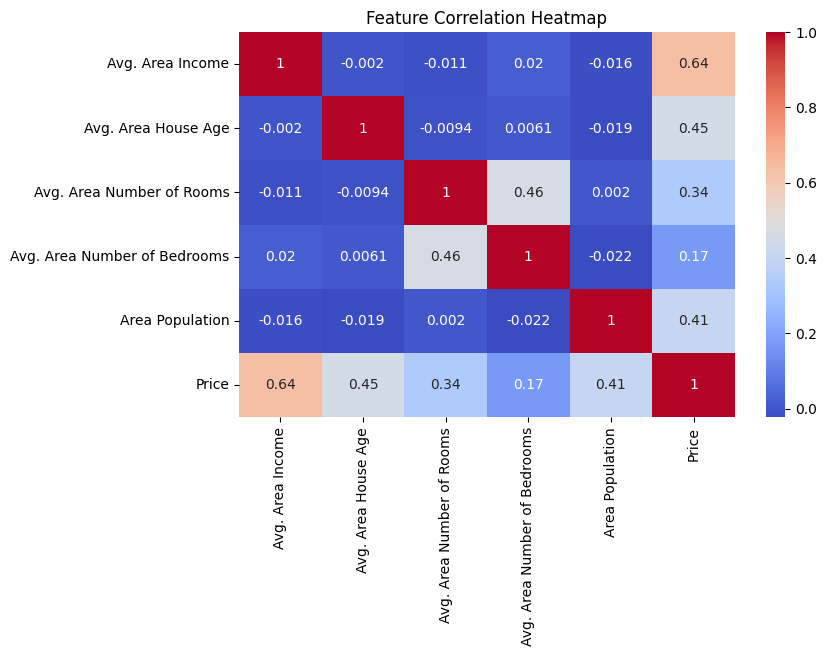

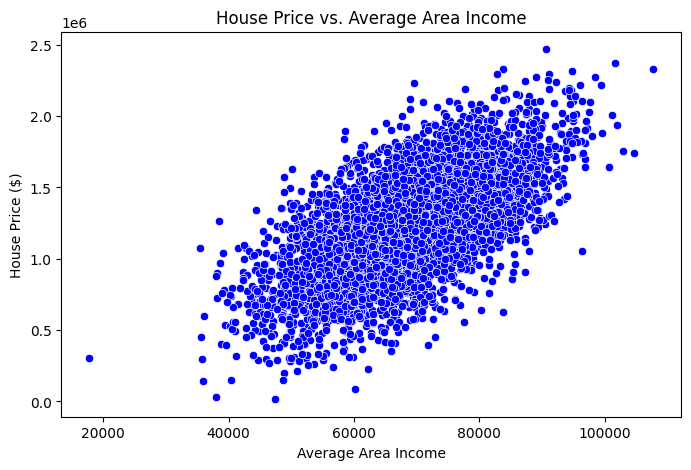

Mean Absolute Error: 80879.10
Root Mean Squared Error: 100444.06
R-squared Score: 0.92


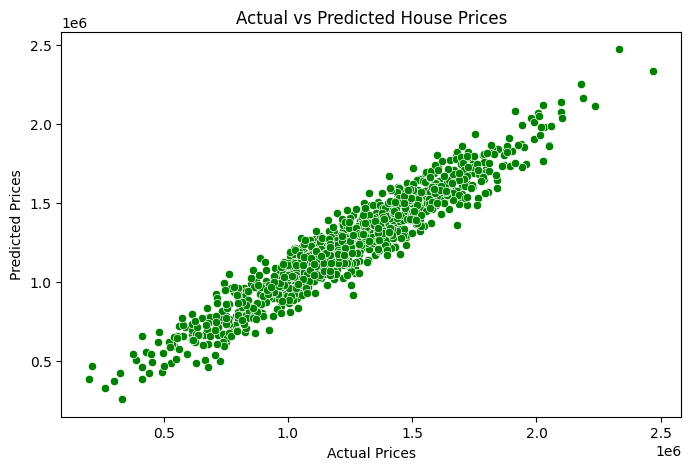

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/USA_Housing.csv"  # Update this if needed
df = pd.read_csv(file_path)

# Selecting relevant features (excluding 'Address')
df = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
         'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]

# Display dataset information
print(df.info())
print(df.head())

# Data visualization - Feature Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Scatter plot for Price vs. Area Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Avg. Area Income'], y=df['Price'], color='blue')
plt.xlabel('Average Area Income')
plt.ylabel('House Price ($)')
plt.title('House Price vs. Average Area Income')
plt.show()

# Splitting the dataset
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Comparing actual vs predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
